In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from pathlib import Path
import os
import precision_functions as prefun

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 300)


### Constants

In [7]:
EVENT = "rastoc:stillness-position-lost"

TRIAL_TAG = 'validation-stimulus' #Opcion: "fixation-stimulus"  # Es el momento donde aparece la cruz de fijacion
FIRST_SAMPLE = 500
MAX_PLOTS = None
VERBOSE = False

ALL_FILES_RAW = list(Path("./raw_data").glob("*.csv"))
LOAD_PATH = "raw_data/gus_webcam4_computer_3_chrome_ubuntu.csv"

### Data load

In [8]:
print(LOAD_PATH)
df = pd.read_csv(LOAD_PATH)
df.head(5)

raw_data/gus_webcam4_computer_3_chrome_ubuntu.csv


,rt,response,trial_type,trial_index,time_elapsed,internal_node_id,run_id,condition,recorded_at,source_code_version,ip,user_agent,device,browser,browser_version,platform,platform_version,load_time,success,jspsych_start_time,item_width_mm,item_height_mm,item_width_px,px2mm,view_dist_mm,item_width_deg,px2deg,win_width_deg,win_height_deg,stimulus,response_type,key_press,avg_frame_time,center_x,center_y,rastoc-type,stimulus-coordinate,calibration-id,calibration-point-id,inner-width,inner-height,webgazer_data,webgazer_targets,session-id,validation-id,tracked-trial-id,trial-tag,start-x,start-y,events
0,12678.0,"{""name-id"":""Gustavo"",""webcam-id"":""4"",""computer...",survey-html-form,0,12683,0.0-0.0,30,1,2023-01-25 17:49:31,8250564b3bfde663ef6456354891c013,157.92.27.254,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,WebKit,Chrome,107.0.0.0,Linux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,webgazer-init-camera,1,47388,0.0-1.0,30,1,2023-01-25 17:49:31,8250564b3bfde663ef6456354891c013,157.92.27.254,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,WebKit,Chrome,107.0.0.0,Linux,NaN,2698.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,fullscreen,2,49828,0.0-2.0,30,1,2023-01-25 17:49:31,8250564b3bfde663ef6456354891c013,157.92.27.254,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,WebKit,Chrome,107.0.0.0,Linux,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,events-tracking-start,3,49829,0.0-3.0,30,1,2023-01-25 17:49:31,8250564b3bfde663ef6456354891c013,157.92.27.254,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,WebKit,Chrome,107.0.0.0,Linux,NaN,NaN,NaN,2023-01-25T17:49:33.664Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,46216.0,NaN,virtual-chinrest,4,96046,0.0-4.0,30,1,2023-01-25 17:49:31,8250564b3bfde663ef6456354891c013,157.92.27.254,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,WebKit,Chrome,107.0.0.0,Linux,NaN,NaN,NaN,NaN,85.6,53.98,346.0,4.04,566.44,8.642075,40.036682,47.956022,26.975262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check rastoc events

In [9]:
events  = prefun.get_rastoc_events(df, EVENT)
print("len(events):", len(events))

len(events): 24


### Precision experiment analysis

In [ ]:
df_res = prefun.calculate_and_plot_errors(df, 
                                   TRIAL_TAG,
                                   first_sample=FIRST_SAMPLE,
                                   max_var=100,
                                   max_plots=MAX_PLOTS, 
                                   verbose=VERBOSE)

print(f"Error: {df_res['total_errors_pxs_mean'].mean():.2f} +- {df_res['total_errors_pxs_mean'].std():.2f}")

### Save

In [11]:
if not os.path.exists('analyzed/'):
    os.mkdir('analyzed')
    
SAVE_PATH = f"analyzed/analyzed_{LOAD_PATH.split('/')[-1]}"
print(f'Saved: {SAVE_PATH}')
df_res.to_csv(SAVE_PATH, index=False)

Saved: analyzed/analyzed_gus_webcam4_computer_3_chrome_ubuntu.csv


In [13]:
print(f"Error: {df_res['total_errors_pxs_mean'].mean():.2f} +- {df_res['total_errors_pxs_mean'].std():.2f}")
print(f"Cantidad de NaNs: {df_res['total_errors_pxs_mean'].isna().sum()}")

Error: 154.81 +- 87.27
Cantidad de NaNs: 22


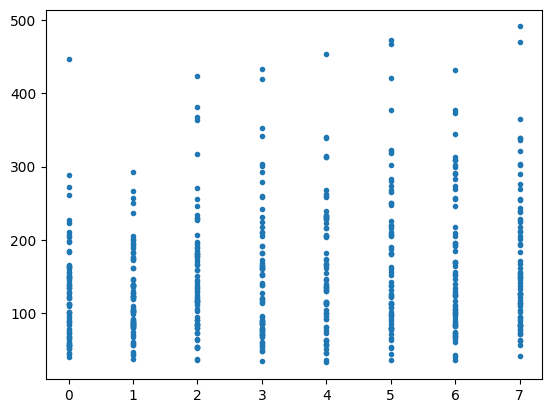

In [14]:
plt.plot((df_res['trials']-1)%8,df_res['total_errors_pxs_mean'],'.')

<AxesSubplot: xlabel='trials', ylabel='total_errors_pxs_mean'>

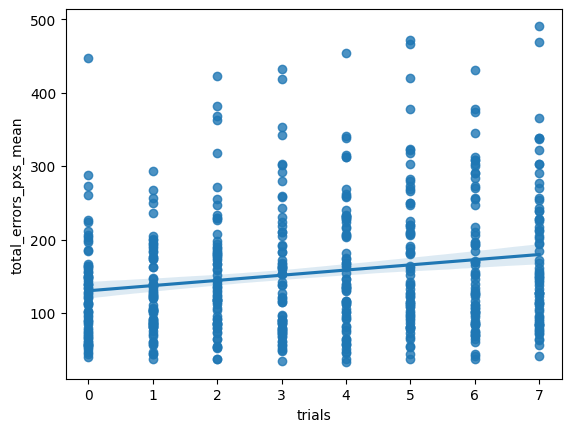

In [106]:
# plt.plot((df_res['trials']-1)%8,df_res['total_errors_pxs_mean'],'.')

a = (df_res['trials']-1)%8
sns.regplot(df_res, x=a, y='total_errors_pxs_mean')


# a = (df_res['trials']-1)%8
# sns.boxplot(data=df_res, x=a, y='total_errors_pxs_mean')

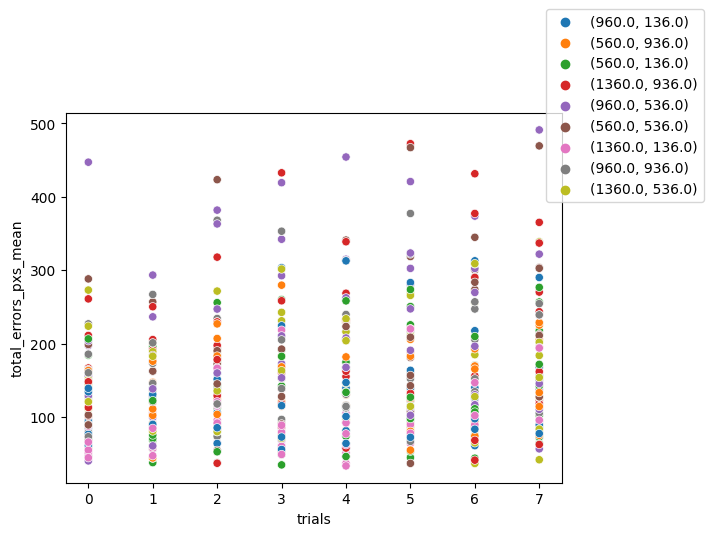

In [107]:
a = (df_res['trials']-1)%8
# sns.regplot(df_res, x=a, y='total_errors_pxs_mean')
ax = sns.scatterplot(df_res,  x=a, y='total_errors_pxs_mean', hue='presented_point')
ax.legend(bbox_to_anchor=(1.3, 1.3))

(0.0, 1080.0)

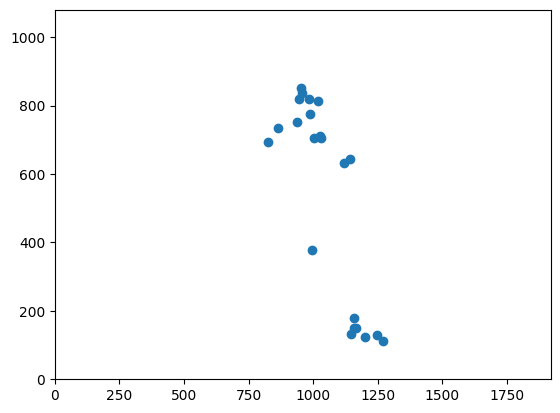

In [14]:
plt.scatter(df_res['webgazer_x'].iloc[10], df_res['webgazer_y'].iloc[10])
plt.xlim(0, 1920)
plt.ylim(0, 1080)

<AxesSubplot: xlabel='presented_point_x', ylabel='presented_point_y'>

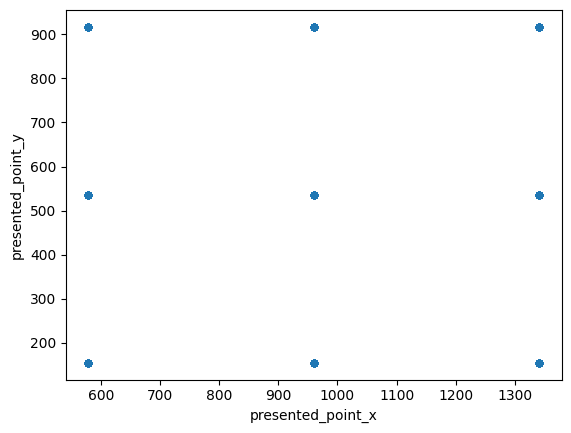

In [93]:
df_res.plot.scatter(x='presented_point_x',y='presented_point_y')

In [90]:
df_res[['presented_point_x','presented_point_y']] = pd.DataFrame(df_res['presented_point'].tolist())

In [71]:
points_position_dict = dict(zip(df_res['presented_point'].unique(), range(1,10)))

df_res['presented_point_index'] = df_res["presented_point"].map(points_position_dict)

In [72]:
df_res[['presented_point_index', 'presented_point']].head(20)

,presented_point_index,presented_point
0,1,"(1341.0, 155.0)"
1,2,"(960.0, 917.0)"
2,3,"(579.0, 536.0)"
3,4,"(960.0, 155.0)"
4,5,"(579.0, 917.0)"
5,6,"(1341.0, 917.0)"
6,7,"(960.0, 536.0)"
7,8,"(579.0, 155.0)"
8,9,"(1341.0, 536.0)"
9,3,"(579.0, 536.0)"


In [50]:
# U = df_res['presented_point'].unique()
# U

# [idx for x,y in df_res['presented_point'] ]

df.columns

Index(['rt', 'response', 'trial_type', 'trial_index', 'time_elapsed',
       'internal_node_id', 'run_id', 'condition', 'recorded_at',
       'source_code_version', 'ip', 'user_agent', 'device', 'browser',
       'browser_version', 'platform', 'platform_version', 'load_time',
       'success', 'jspsych_start_time', 'item_width_mm', 'item_height_mm',
       'item_width_px', 'px2mm', 'view_dist_mm', 'item_width_deg', 'px2deg',
       'win_width_deg', 'win_height_deg', 'stimulus', 'response_type',
       'key_press', 'avg_frame_time', 'center_x', 'center_y', 'rastoc-type',
       'stimulus-coordinate', 'calibration-id', 'calibration-point-id',
       'inner-width', 'inner-height', 'webgazer_data', 'webgazer_targets',
       'session-id', 'validation-id', 'tracked-trial-id', 'trial-tag',
       'start-x', 'start-y', 'events'],
      dtype='object')

<AxesSubplot: xlabel='trials', ylabel='total_errors_pxs_mean'>

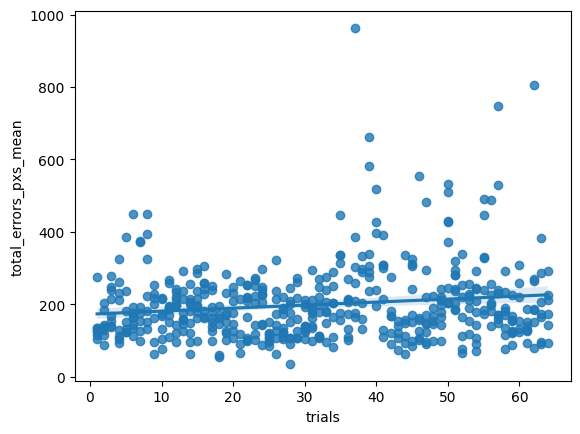

In [42]:
# plt.plot(df_res['trials'],df_res['total_errors_pxs_mean'],'.')
sns.regplot(df_res, x='trials', y='total_errors_pxs_mean')


In [28]:
(8-1)%8

7

In [ ]:
ALL_FILES_ANALYZED = list(Path("./analyzed").glob("*.csv"))
ALL_FILES_ANALYZED

prefun.evaluate_experiment_instances(ALL_FILES_ANALYZED)

In [ ]:
df_res['first_sample'].iloc[0]

In [22]:
# /2
# cx: 682.5
# cy: 380


# /2.5
# cx: 546
# cy: 304

# /1.8
# cx: 758.3333333333334
# cy: 422.22222222222223

# 1366x768

1372.5773000000002